In [1]:
import pandas as pd
import numpy as np

In [2]:
train_features_file = pd.read_csv("training_set_features.csv")
train_features_file

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [3]:
targets = pd.read_csv("training_set_labels.csv")
targets

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [4]:
target_h1n1 = pd.DataFrame(targets['h1n1_vaccine'])
target_h1n1

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0
...,...
26702,0
26703,0
26704,0
26705,0


In [5]:
target_seasonal = pd.DataFrame(targets['seasonal_vaccine'])
target_seasonal

,seasonal_vaccine
0,0
1,1
2,0
3,1
4,0
...,...
26702,0
26703,0
26704,1
26705,0


## Feature Engineering

In [6]:
# creating ismale, ismarried, isemployed and ownhouse fields to use numerical values for a given dataset
def feature_engineering(df):
    df['ismale'] = np.where(df['sex'] == 'Male', 1, 0)
    df['ismarried'] = np.where(df['marital_status'] == 'Married', 1, 0)
    df['isemployed'] = np.where(df['employment_status'] == 'Employed', 1, 0)
    df['ownhouse'] = np.where(df['rent_or_own'] == 'Own', 1, 0)

    return df

In [7]:
X = pd.DataFrame(feature_engineering(train_features_file))
X

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,ismale,ismarried,isemployed,ownhouse
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1,0,1,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,1
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,1,0,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,1,1,0


### Numerical & Categorical Features Selector

In [8]:
from sklearn.compose import make_column_selector

categorical_features_selector = make_column_selector(dtype_include=object)
numerical_features_selector = make_column_selector(dtype_exclude=object)

### Numerical Pre-Processor

In [9]:
from sklearn import pipeline
from sklearn import preprocessing

## Scaling values using a Min-Max Scaler.
numerical_preprocessor = pipeline.Pipeline(steps=[
    ("scaler", preprocessing.MinMaxScaler())
])

### Categorical Pre-Processor

In [10]:
from category_encoders import TargetEncoder, JamesSteinEncoder
from sklearn.preprocessing import OneHotEncoder

## Transforming categorical columns to ordinal values.
categorical_preprocessor = pipeline.Pipeline(steps=[
    ("target", TargetEncoder())
])

In [11]:
X

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,ismale,ismarried,isemployed,ownhouse
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1,0,1,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,1
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,1,0,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,1,1,0


In [12]:
from sklearn import compose


categorical_features = categorical_features_selector(X)
numerical_features = numerical_features_selector(X)

preprocessor = compose.ColumnTransformer(
    transformers=[
        ("numerical_preprocessor", numerical_preprocessor, numerical_features),
        ("categorical_preprocessor", categorical_preprocessor, categorical_features)
    ]
)

In [13]:
categorical_features

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [14]:
numerical_features

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'ismale',
 'ismarried',
 'isemployed',
 'ownhouse']

# Train Test Split

### Train Test Split H1N1

In [15]:
X

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,ismale,ismarried,isemployed,ownhouse
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,1,0,1,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0,0,1
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,1,0,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,0,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,1,1,0


In [16]:
from sklearn.model_selection import train_test_split

# train test split based on the h1n1 target
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, target_h1n1, test_size = .2, random_state = 42)

In [17]:
X_test_h1n1

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,ismale,ismarried,isemployed,ownhouse
15772,15772,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,atmpeygn,"MSA, Principle City",NaN,NaN,NaN,NaN,0,0,0,0
9407,9407,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,fpwskwrf,"MSA, Principle City",1.0,1.0,NaN,NaN,1,0,0,0
16515,16515,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,atmpeygn,"MSA, Not Principle City",0.0,1.0,mfikgejo,mxkfnird,0,0,1,1
23353,23353,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,bhuqouqj,Non-MSA,1.0,2.0,cfqqtusy,xtkaffoo,0,1,1,1
10008,10008,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,lrircsnp,"MSA, Principle City",1.0,0.0,wxleyezf,xtkaffoo,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25132,25132,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,oxchjgsf,"MSA, Not Principle City",1.0,2.0,ldnlellj,hfxkjkmi,0,1,1,1
20086,20086,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,oxchjgsf,"MSA, Not Principle City",0.0,0.0,arjwrbjb,rcertsgn,1,0,1,1
5045,5045,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,qufhixun,Non-MSA,1.0,3.0,atmlpfrs,xqwwgdyp,1,1,1,1
6340,6340,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,atmpeygn,"MSA, Principle City",1.0,3.0,vjjrobsf,rcertsgn,1,1,1,1


### Train Test Split Seasonal

In [18]:
from sklearn.model_selection import train_test_split

# train test split based on the seasonal target
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, target_seasonal, test_size = .2, random_state = 42)

# Common Train, Test  & Cross-Validation Function

In [25]:
%%time
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def train(X_train, y_train, X_test, y_test):

    params = {'loss_function': 'Logloss', ##Objective function
              'eval_metric': 'AUC',  ##performance metric
              'verbose': 200,        #output info about training process every 200 iterations
              'random_seed': None
              
              }

    model = CatBoostClassifier(**params)

    ## preprocessing on the training data: fit & transform
    X_train_pp = preprocessor.fit_transform(X_train, y_train)

    ## only transform on the test data
    X_test_pp = preprocessor.transform(X_test)

    #train the model
    model.fit(X_train_pp, y_train,   #training data
                   eval_set=(X_test_pp, y_test), #validation data
                   use_best_model = True,  #True if we dont want to save trees created after iteration
                   plot=True     #Shows visualization of the training process
                   );

    #predict the training set
    pred = model.predict(X_test_pp)

    #perform cross validation
    cv_score = cross_val_score(model, X_train_pp, y_train, scoring='neg_mean_squared_error', cv = 5)
    cv_score = np.abs(np.mean(cv_score))

    print('Model Report')
    print('MSE:', mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

    return model, X_train_pp

Wall time: 0 ns


# Checking Cross Validation Score and Mean Square Error on h1n1 Vaccine Train Data

In [20]:
%%time
model_h1n1, X_train_h1n1_pp = train(X_train_h1n1, y_train_h1n1, X_test_h1n1, y_test_h1n1)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.067507
0:	test: 0.8162872	best: 0.8162872 (0)	total: 185ms	remaining: 3m 5s
200:	test: 0.8726376	best: 0.8726489 (168)	total: 1.64s	remaining: 6.53s
400:	test: 0.8710719	best: 0.8729376 (221)	total: 3.03s	remaining: 4.53s
600:	test: 0.8682053	best: 0.8729376 (221)	total: 4.38s	remaining: 2.91s
800:	test: 0.8661046	best: 0.8729376 (221)	total: 5.71s	remaining: 1.42s
999:	test: 0.8634790	best: 0.8729376 (221)	total: 7.05s	remaining: 0us

bestTest = 0.8729376245
bestIteration = 221

Shrink model to first 222 iterations.
Learning rate set to 0.034621
0:	total: 6.79ms	remaining: 6.78s
200:	total: 1.25s	remaining: 4.95s
400:	total: 2.5s	remaining: 3.73s
600:	total: 3.73s	remaining: 2.48s
800:	total: 4.94s	remaining: 1.23s
999:	total: 6.17s	remaining: 0us
Learning rate set to 0.034621
0:	total: 4.93ms	remaining: 4.93s
200:	total: 1.27s	remaining: 5.06s
400:	total: 2.52s	remaining: 3.77s
600:	total: 3.79s	remaining: 2.51s
800:	total: 5.09s	remaining: 1.26s
999:	total: 6.

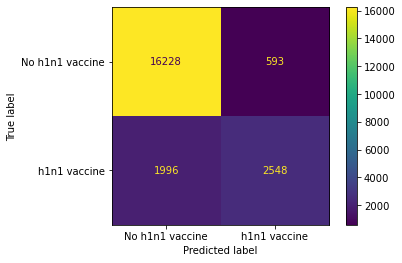

In [21]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_h1n1, X_train_h1n1_pp, y_train_h1n1, values_format='d', display_labels=['No h1n1 vaccine','h1n1 vaccine'])

# Model Building for seasonal vaccine

In [22]:
%%time
model_seasonal, X_train_seasonal_pp = train(X_train_seasonal, y_train_seasonal, X_test_seasonal, y_test_seasonal)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.067507
0:	test: 0.8166716	best: 0.8166716 (0)	total: 8.04ms	remaining: 8.03s
200:	test: 0.8651141	best: 0.8651735 (192)	total: 1.62s	remaining: 6.43s
400:	test: 0.8646038	best: 0.8654308 (216)	total: 3.16s	remaining: 4.72s
600:	test: 0.8637335	best: 0.8654308 (216)	total: 4.69s	remaining: 3.11s
800:	test: 0.8623609	best: 0.8654308 (216)	total: 6.27s	remaining: 1.56s
999:	test: 0.8613975	best: 0.8654308 (216)	total: 7.82s	remaining: 0us

bestTest = 0.8654307936
bestIteration = 216

Shrink model to first 217 iterations.
Learning rate set to 0.034621
0:	total: 8.75ms	remaining: 8.74s
200:	total: 1.31s	remaining: 5.19s
400:	total: 2.61s	remaining: 3.9s
600:	total: 3.91s	remaining: 2.6s
800:	total: 5.2s	remaining: 1.29s
999:	total: 6.44s	remaining: 0us
Learning rate set to 0.034621
0:	total: 7.47ms	remaining: 7.46s
200:	total: 1.38s	remaining: 5.48s
400:	total: 2.7s	remaining: 4.03s
600:	total: 4s	remaining: 2.65s
800:	total: 5.34s	remaining: 1.33s
999:	total: 6.61s	r

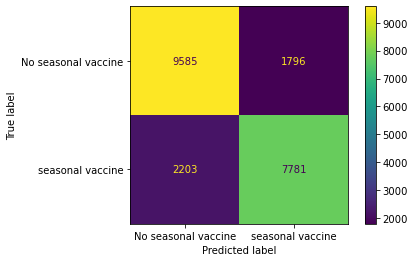

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_seasonal, X_train_seasonal_pp, y_train_seasonal, values_format='d', display_labels=['No seasonal vaccine','seasonal vaccine'])

# PREDICTING ON THE REAL TEST DATA

In [24]:
X_real = pd.read_csv("test_set_features.csv")    ##Uploading the real test data
X_real.shape

(26708, 36)

### Feature Engineering

In [25]:
X_real = feature_engineering(X_real)
X_real

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,ismale,ismarried,isemployed,ownhouse
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi,0,0,1,0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp,1,0,1,0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik,1,1,1,1
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0,1,0,1
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN,0,0,0,0
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov,1,1,1,0
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0,0,0,0
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0,1,0,1


### Pre-Process the Test Data

In [30]:

X_real_pp = preprocessor.transform(X_real)

## Predict H1N1

In [84]:
target_h1n1_real = model_h1n1.predict_proba(X_real_pp)
target_h1n1_real

array([[0.56386297, 0.43613703],
       [0.90389407, 0.09610593],
       [0.76806441, 0.23193559],
       ...,
       [0.40448172, 0.59551828],
       [0.92436413, 0.07563587],
       [0.17403851, 0.82596149]])

In [85]:
target_h1n1_real.shape

(26708, 2)

## Predict Seasonal

In [86]:
target_seasonal_real = model_seasonal.predict_proba(X_real_pp)
target_seasonal_real

array([[0.86315162, 0.13684838],
       [0.96776481, 0.03223519],
       [0.3424028 , 0.6575972 ],
       ...,
       [0.78539853, 0.21460147],
       [0.69929494, 0.30070506],
       [0.47389858, 0.52610142]])

# Output

# Trry from youtube

In [87]:
np.array(target_seasonal_real)

array([[0.86315162, 0.13684838],
       [0.96776481, 0.03223519],
       [0.3424028 , 0.6575972 ],
       ...,
       [0.78539853, 0.21460147],
       [0.69929494, 0.30070506],
       [0.47389858, 0.52610142]])

In [93]:
submission = pd.DataFrame()
submission['respondent_id'] = X_real['respondent_id']
submission['h1n1_vaccine'] = target_h1n1_real[: , 1]
submission['seasonal_vaccine'] = target_seasonal_real[: , 1]
submission

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.436137,0.136848
1,26708,0.096106,0.032235
2,26709,0.231936,0.657597
3,26710,0.597136,0.845594
4,26711,0.844013,0.440477
...,...,...,...
26703,53410,0.288796,0.469438
26704,53411,0.376478,0.201031
26705,53412,0.595518,0.214601
26706,53413,0.075636,0.300705


In [94]:
submission.to_csv('submission_format.csv', index=False)

# End of try from youtube

In [33]:
submission_df = pd.read_csv("submission_format.csv", 
                            index_col="respondent_id")

In [34]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [50]:
print("target_h1n1_real[0].shape", pred[0].shape)
print("target_h1n1_real[1].shape", pred[1].shape)

NameError: name 'pred' is not defined

In [41]:
np.testing.assert_array_equal(X_real.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = target_h1n1_real[0][:, 1]
submission_df["seasonal_vaccine"] = target_seasonal_real[1][:, 1]

submission_df.head()

AssertionError: 
Arrays are not equal

Mismatched elements: 26708 / 26708 (100%)
Max absolute difference: 26707
Max relative difference: 1.
 x: array([    0,     1,     2, ..., 26705, 26706, 26707], dtype=int64)
 y: array([26707, 26708, 26709, ..., 53412, 53413, 53414], dtype=int64)

In [29]:
output = pd.DataFrame({'respondent_id': X_real['respondent_id'], 'h1n1_vaccine': target_h1n1_real, 'seasonal_vaccine': target_seasonal_real})

ValueError: Data must be 1-dimensional

In [69]:
output

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0,0
1,26708,0,0
2,26709,0,1
3,26710,1,1
4,26711,1,0
...,...,...,...
26703,53410,0,0
26704,53411,0,0
26705,53412,1,0
26706,53413,0,0


In [65]:
from datetime import datetime

# convert datetime obj to string
str_current_datetime = datetime.now().strftime("%Y_%m_%d-%I-%M-%S_%p")

file_name = 'submission_cat_' + str_current_datetime + '.csv'
output.to_csv(file_name, index=False)
file_name

'submission_cat_2021_12_02-11-19-48_PM.csv'